<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment11/Gambler's_ruin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gd = {'a': ['b', 'd'], # a -> b, a -> d
      'b': ['c', 'd', 'a'] } # b -> c, b -> d, b -> a

In [ ]:
gd = {'a': {'b': {'weight': 0.1},
            'd': {'weight': 0.8}},
      'b': {'d': {'weight': 0.5},
            'c': {'weight': 0.5}}
      }

In [ ]:
import networkx as nx
g = nx.DiGraph(gd) # dictionary to graph

In [ ]:
g['a']

AtlasView({'b': {'weight': 0.1}, 'd': {'weight': 0.8}})

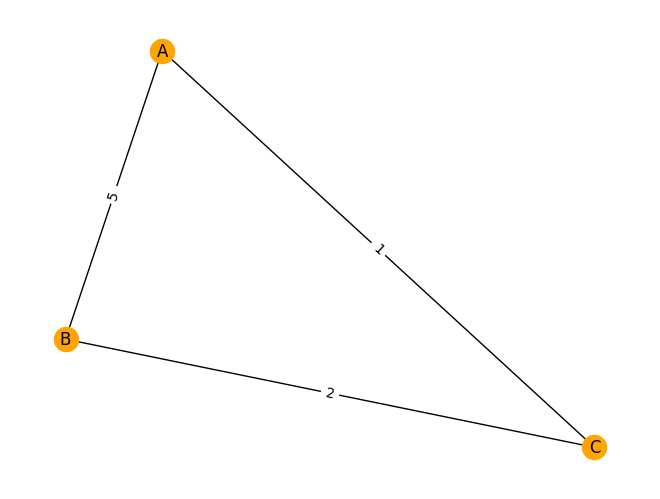

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(g):
    pos = nx.spring_layout(g)  # You can choose a different layout method
    nx.draw(g, pos, with_labels=True, node_color='orange')
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
    plt.show()

G = nx.Graph()
G.add_edge('A', 'B', weight=5)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'A', weight=1)

plot_graph(G)



In [ ]:
import numpy as np
np.set_printoptions(suppress=True)
# S0 S1 S2 S3
P = np.array([[0, 0.0, 0.5, 0.5],  # S0
              [1.0, 0.0, 0.0, 0.0], # S1
              [0.0, 0.0, 0.0, 1.0], #S2
              [0, 1.0, 0.0, 0.0]]) # S3
              # Here S0, S1, S2, S3 are conceptual labels either
              # for the Markov chain states or the digraph vertices

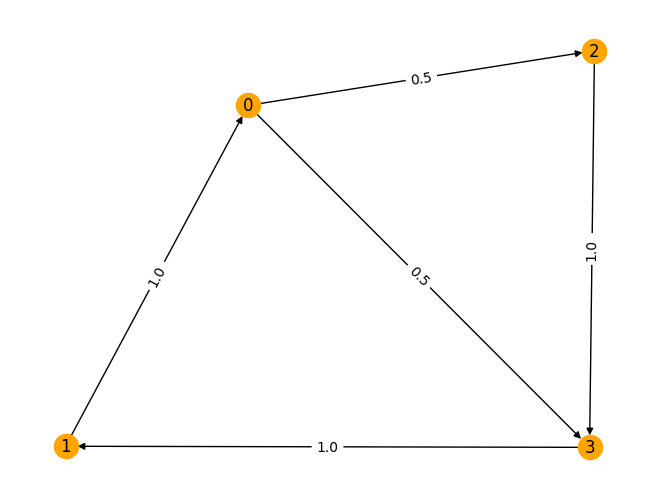

In [ ]:
gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def plot_gph(g):
    pos = nx.spring_layout(g)  # You can choose a different layout method
    nx.draw(g, pos, with_labels=True, node_color='orange')
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
    plt.show()
plot_gph(gP)



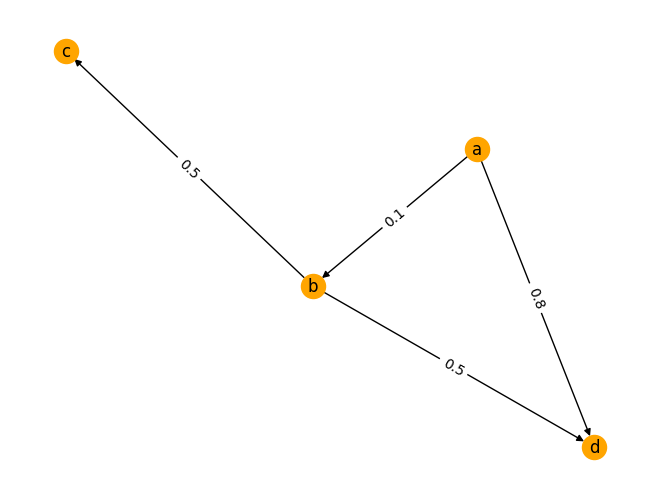

In [ ]:
plot_gph(g)

In [ ]:
g.nodes # note the ordering of vertices

NodeView(('a', 'b', 'd', 'c'))

In [ ]:
def PforG(p=0.4, N=10):
    q = 1 - p
    P = np.diag(q*np.ones(N), k=-1) + np.diag(p*np.ones(N), k=1)
    P[0, :] = 0
    P[0, 0] = 1
    P[N, :] = 0
    P[N, N] = 1
    return P
PforG(p=0.4)

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [ ]:
from numpy.linalg import eig, inv, det
P = PforG(p=0.4)
ew, ev = eig(P)
ew

array([-0.93184127, -0.79267153, -0.57590958, -0.30277358, -0.        ,
        0.93184127,  0.79267153,  0.30277358,  0.57590958,  1.        ,
        1.        ])

In [ ]:
H = ev[:, abs(ew -1) < 1e-15] # Eigenvectors of eigenvalue 1
M = np.array([H[0, :],
              H[-1, :]]) # Matrix of the two conditions
det(M)

0.2825542003687932

In [ ]:
def Gchances(p=0.4, N=10):
  P = PforG(p, N)
  ew, ev = eig(P)
  H = ev[:, abs(ew -1) < 1e-15]
  M = np.array([H[0, :], H[-1, :]])
  c = inv(M) @ np.array([0, 1])
  return H @ c

In [ ]:
h = Gchances(p=0.4)
h

array([0.        , 0.00882378, 0.02205946, 0.04191297, 0.07169324,
       0.11636364, 0.18336924, 0.28387764, 0.43464024, 0.66078414,
       1.        ])

In [ ]:
from random import uniform
def gamble(init=2, p=0.4, win=10, n=10000):
  """Let G gamble "n" times, starting with "init" chips."""
  wl = np.zeros(n)   # mark win or lose here for each gamble i
  for i in range(n):
    chips = init
    while chips:
       if uniform(0, 1) > p:  # losing game
        chips -= 1
    else: # winning game
         chips += 1
    if chips == win:     # reached wanted winnings
       wl[i] = 1
       break
  return wl

In [ ]:
n = 500000
wl = gamble(n=n)
print('Proportion of winning gambles:', np.count_nonzero(wl) / n)

Proportion of winning gambles: 0.0


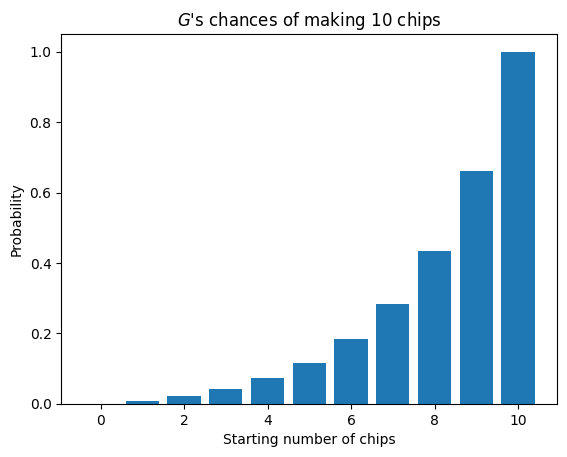

In [ ]:
plt.bar(range(len(h)), h)
plt.title('$G$\'s chances of making 10 chips');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');

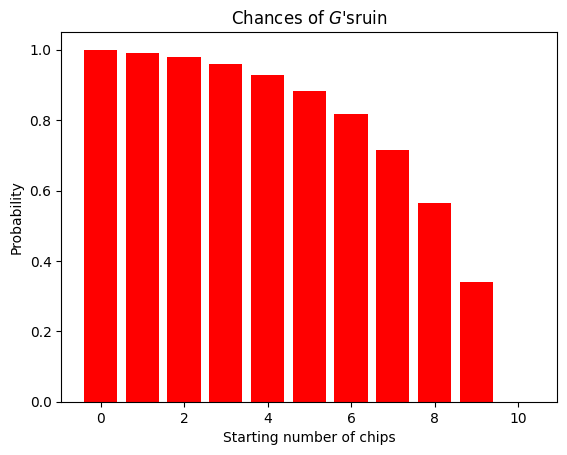

In [ ]:
plt.bar(range(len(h)), 1-h, color='red')
plt.title('Chances of $G$\'sruin');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');

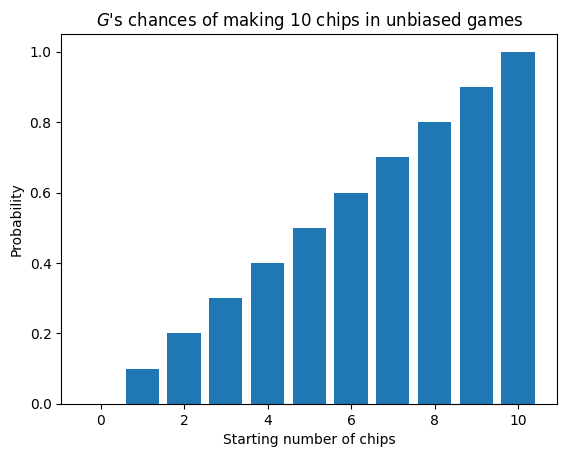

In [ ]:
plt.bar(range(len(h)), Gchances(p=0.5, N=10))
plt.title('$G$\'s chances of making 10 chips in unbiased games');
plt.xlabel('Starting number of chips'); plt.ylabel('Probability');

In [ ]:
A = [0, 10]
B = range(1, 10)
P = PforG()
PAA = P[np.ix_(A, A)]
PBA = P[np.ix_(B, A)]
PBB = P[np.ix_(B, B)]

In [ ]:
PBA

array([[0.6, 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0.4]])

In [ ]:
PBB

array([[0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0.4],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ]])

In [ ]:
PAA

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.linalg.inv(np.eye(len(B)) -PBB) @ PBA

array([[0.99117622, 0.00882378],
       [0.97794054, 0.02205946],
       [0.95808703, 0.04191297],
       [0.92830676, 0.07169324],
       [0.88363636, 0.11636364],
       [0.81663076, 0.18336924],
       [0.71612236, 0.28387764],
       [0.56535976, 0.43464024],
       [0.33921586, 0.66078414]])

In [ ]:
from scipy.sparse import diags, eye
from scipy.sparse.linalg import spsolve

In [4]:
def sparseGmats(p=0.4, N=10000):
    """ Return I -PBB and PBA as sparse matrices """
    q = 1 -p
    # Note that the first and last row of P are not accurate
    # in this construction, but we're going to trim them away:
    P = diags(q*np.ones(N), offsets=-1, shape=(N+1, N+1)) \
    +   diags(p*np.ones(N), offsets=1,  shape=(N+1, N+1))
    A = [0, N]
    B = range(1, N)
    I_PBB = (eye(N-1) -P[np.ix_(B, B)]).tocsc()
    PBA = P[np.ix_(B, A)].tocsc()
    return I_PBB, PBA
def ruinG(p=0.4, N=10000):
    """ Given that the winning probability of each game is "p", compute the probability of G's ruin for each starting state """
    I_PBB, PBA = sparseGmats(p, N)
    return spsolve(I_PBB, PBA[:, 0])